# Scipy

The `scipy` package contains various toolboxes dedicated to common
issues in scientific computing. Its different submodules correspond to
different applications, such as interpolation, integration,
optimization, image processing, statistics, special functions, etc.

`scipy` can be compared to other standard scientific-computing
libraries, such as the GSL (GNU Scientific Library for C and C++), or
Matlab's toolboxes. `scipy` is the core package for scientific routines
in Python; it is meant to operate efficiently on `numpy` arrays, so that
numpy and scipy work hand in hand.

Before implementing a routine, it is worth checking if the desired data
processing is not already implemented in Scipy. As non-professional
programmers, scientists often tend to **re-invent the wheel**, which
leads to buggy, non-optimal, difficult-to-share and unmaintainable code.
By contrast, `Scipy`'s routines are optimized and tested, and should
therefore be used when possible.

`scipy` is composed of task-specific sub-modules:

<table>
<tbody>
<tr class="odd">
<td><code class="interpreted-text" role="mod">scipy.cluster</code></td>
<td><blockquote>
<p>Vector quantization / Kmeans</p>
</blockquote></td>
</tr>
<tr class="even">
<td><code class="interpreted-text" role="mod">scipy.constants</code></td>
<td><blockquote>
<p>Physical and mathematical constants</p>
</blockquote></td>
</tr>
<tr class="odd">
<td><code class="interpreted-text" role="mod">scipy.fftpack</code></td>
<td><blockquote>
<p>Fourier transform</p>
</blockquote></td>
</tr>
</tbody>
</table>

<table>
<tbody>
<tr class="even">
<td><code class="interpreted-text" role="mod">scipy.integrate</code></td>
<td><blockquote>
<p>Integration routines</p>
</blockquote></td>
</tr>
<tr class="odd">
<td><code class="interpreted-text" role="mod">scipy.interpolate</code></td>
<td><blockquote>
<p>Interpolation</p>
</blockquote></td>
</tr>
<tr class="even">
<td><code class="interpreted-text" role="mod">scipy.io</code></td>
<td><blockquote>
<p>Data input and output</p>
</blockquote></td>
</tr>
</tbody>
</table>

<table>
<tbody>
<tr class="odd">
<td><code class="interpreted-text" role="mod">scipy.linalg</code></td>
<td><blockquote>
<p>Linear algebra routines</p>
</blockquote></td>
</tr>
<tr class="even">
<td><code class="interpreted-text" role="mod">scipy.ndimage</code></td>
<td><blockquote>
<p>n-dimensional image package</p>
</blockquote></td>
</tr>
<tr class="odd">
<td><code class="interpreted-text" role="mod">scipy.odr</code></td>
<td><blockquote>
<p>Orthogonal distance regression</p>
</blockquote></td>
</tr>
</tbody>
</table>

<table>
<tbody>
<tr class="even">
<td><code class="interpreted-text" role="mod">scipy.optimize</code></td>
<td><blockquote>
<p>Optimization</p>
</blockquote></td>
</tr>
<tr class="odd">
<td><code class="interpreted-text" role="mod">scipy.signal</code></td>
<td><blockquote>
<p>Signal processing</p>
</blockquote></td>
</tr>
<tr class="even">
<td><code class="interpreted-text" role="mod">scipy.sparse</code></td>
<td><blockquote>
<p>Sparse matrices</p>
</blockquote></td>
</tr>
</tbody>
</table>

<table>
<tbody>
<tr class="odd">
<td><code class="interpreted-text" role="mod">scipy.spatial</code></td>
<td><blockquote>
<p>Spatial data structures and algorithms</p>
</blockquote></td>
</tr>
<tr class="even">
<td><code class="interpreted-text" role="mod">scipy.special</code></td>
<td><blockquote>
<p>Any special mathematical functions</p>
</blockquote></td>
</tr>
<tr class="odd">
<td><code class="interpreted-text" role="mod">scipy.stats</code></td>
<td><blockquote>
<p>Statistics</p>
</blockquote></td>
</tr>
</tbody>
</table>

They all depend on `numpy`, but are mostly independent of each other.
The standard way of importing Numpy and these Scipy modules is:

In [1]:
import numpy as np
from scipy import stats  # same for other sub-modules

The main `scipy` namespace mostly contains functions that are really
numpy functions (try `scipy.cos is np.cos`). Those are exposed for
historical reasons; there's no reason to use `import scipy` in your
code.

## File input/output: `scipy.io`

**Matlab files**: Loading and saving:

In [2]:
from scipy import io as spio
a = np.ones((3, 3))
spio.savemat('file.mat', {'a': a}) # savemat expects a dictionary
data = spio.loadmat('file.mat')
data['a']

array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]])

Warning

**Python / Matlab mismatches**, *eg* matlab does not represent 1D arrays

In [3]:
a = np.ones(3)
a

array([1., 1., 1.])

In [4]:
spio.savemat('file.mat', {'a': a})
spio.loadmat('file.mat')['a']

array([[1., 1., 1.]])

-   Load text files: `numpy.loadtxt`/`numpy.savetxt`
-   Clever loading of text/csv files:
    `numpy.genfromtxt`/`numpy.recfromcsv`
-   Fast and efficient, but numpy-specific, binary format:
    `numpy.save`/`numpy.load`
-   More advanced input/output of images in scikit-image: `skimage.io`

## Linear algebra operations: `scipy.linalg`

The `scipy.linalg` module provides standard linear algebra operations,
relying on an underlying efficient implementation (BLAS, LAPACK).

-   The `scipy.linalg.det` function computes the determinant of a square
    matrix:

In [5]:
    from scipy import linalg
    arr = np.array([[1, 2],
                    [3, 4]])
    linalg.det(arr)

-2.0

In [6]:
    arr = np.array([[3, 2],
                    [6, 4]])
    linalg.det(arr)

0.0

In [7]:
linalg.det(np.ones((3, 4)))

ValueError: expected square matrix

-   The `scipy.linalg.inv` function computes the inverse of a square
    matrix:

In [8]:
    arr = np.array([[1, 2],
                    [3, 4]])
    iarr = linalg.inv(arr)
    iarr

array([[-2. ,  1. ],
       [ 1.5, -0.5]])

In [10]:
    arr = np.array([[3, 2],
                    [6, 4]])
    linalg.inv(arr)

LinAlgError: singular matrix

-   More advanced operations are available, for example singular-value
    decomposition (SVD):

In [11]:
import numpy as np
from scipy import linalg

In [12]:
arr = np.arange(9).reshape((3, 3)) + np.diag([1, 0, 1])
print(arr)
uarr, spec, vharr = linalg.svd(arr)

[[1 1 2]
 [3 4 5]
 [6 7 9]]


In [13]:
arr,uarr, spec, vharr

(array([[1, 1, 2],
        [3, 4, 5],
        [6, 7, 9]]),
 array([[-0.1617463 , -0.98659196,  0.02178164],
        [-0.47456365,  0.09711667,  0.87484724],
        [-0.86523261,  0.13116653, -0.48390895]]),
 array([14.88982544,  0.45294236,  0.29654967]),
 array([[-0.45513179, -0.54511245, -0.70406496],
        [ 0.20258033,  0.70658087, -0.67801525],
        [-0.86707339,  0.45121601,  0.21115836]]))

In [14]:

sarr = np.diag(spec)
svd_mat = uarr.dot(sarr).dot(vharr)
svd_mat

array([[1., 1., 2.],
       [3., 4., 5.],
       [6., 7., 9.]])

- The original matrix can be re-composed by matrix multiplication of
    the outputs of `svd` with `np.dot` :

In [15]:

    sarr = np.diag(spec)
    svd_mat = uarr.dot(sarr).dot(vharr)
    np.allclose(svd_mat, arr)


True

- SVD is commonly used in statistics and signal processing. Many other
    standard decompositions (QR, LU, Cholesky, Schur), as well as
    solvers for linear systems, are available in `scipy.linalg`.


## Interpolation: `scipy.interpolate`

`scipy.interpolate` is useful for fitting a function from experimental
data and thus evaluating points where no measure exists. The module is
based on the [FITPACK Fortran subroutines]().

By imagining experimental data close to a sine function:

In [16]:
measured_time = np.linspace(0, 1, 10)
noise = (np.random.random(10)*2 - 1) * 1e-1
measures = np.sin(2 * np.pi * measured_time) + noise

In [17]:
measures

array([ 0.00324328,  0.56277322,  0.98070966,  0.96449876,  0.38735454,
       -0.2714309 , -0.79731099, -1.06342721, -0.6101655 ,  0.06060649])

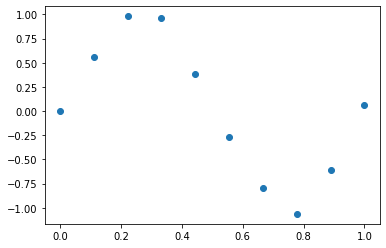

In [18]:
# Plot the data and the interpolation
from matplotlib import pyplot as plt
plt.figure(figsize=(6, 4))
plt.plot(measured_time, measures, 'o', ms=6, label='measures')

In [37]:
from scipy import linalg

`scipy.interpolate.interp1d` can build a linear interpolation function:

In [39]:
interpolation_time = np.linspace(0, 1, 50)
linear_results = linear_interp(interpolation_time)

AttributeError: module 'scipy.linalg' has no attribute 'linear_interp'

Then the result can be evaluated at the time of interest:

NameError: name 'linear_results' is not defined

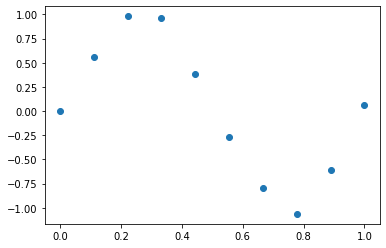

In [22]:
# Plot the data and the interpolation
from matplotlib import pyplot as plt
plt.figure(figsize=(6, 4))
plt.plot(measured_time, measures, 'o', ms=6, label='measures')
plt.plot(interpolation_time, linear_results, label='linear interp')

A cubic interpolation can also be selected by providing the `kind`
optional keyword argument:

In [23]:
cubic_interp = interp1d(measured_time, measures, kind='cubic')
cubic_results = cubic_interp(interpolation_time)

NameError: name 'interp1d' is not defined

NameError: name 'cubic_results' is not defined

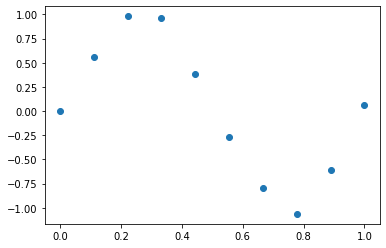

In [24]:
# Plot the data and the interpolation
from matplotlib import pyplot as plt
plt.figure(figsize=(6, 4))
plt.plot(measured_time, measures, 'o', ms=6, label='measures')
plt.plot(interpolation_time, cubic_results, label='cubic interp')

`scipy.interpolate.interp2d` is similar to `scipy.interpolate.interp1d`,
but for 2-D arrays. Note that for the $interp$ family, the interpolation
points must stay within the range of given data points. See the summary
exercise on
[summary\_exercise\_stat\_interp](summary_exercise_stat_interp.ipynb)
for a more advanced spline interpolation example.

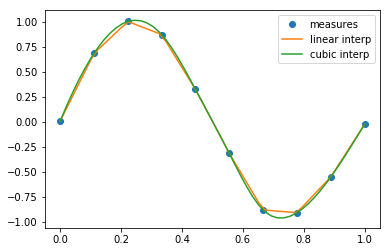

In [57]:
# Generate data
import numpy as np
np.random.seed(0)
measured_time = np.linspace(0, 1, 10)
noise = 1e-1 * (np.random.random(10)*2 - 1)
measures = np.sin(2 * np.pi * measured_time) + noise

# Interpolate it to new time points
from scipy.interpolate import interp1d
linear_interp = interp1d(measured_time, measures)
interpolation_time = np.linspace(0, 1, 50)
linear_results = linear_interp(interpolation_time)
cubic_interp = interp1d(measured_time, measures, kind='cubic')
cubic_results = cubic_interp(interpolation_time)

# Plot the data and the interpolation
from matplotlib import pyplot as plt
plt.figure(figsize=(6, 4))
plt.plot(measured_time, measures, 'o', ms=6, label='measures')
plt.plot(interpolation_time, linear_results, label='linear interp')
plt.plot(interpolation_time, cubic_results, label='cubic interp')
plt.legend()
plt.show()

## Optimization and fit: `scipy.optimize`

Optimization is the problem of finding a numerical solution to a
minimization or equality.

Tip

The `scipy.optimize` module provides algorithms for function
minimization (scalar or multi-dimensional), curve fitting and root
finding. :

In [14]:
from scipy import optimize

### Curve fitting


Suppose we have data on a sine wave, with some noise: :

In [15]:
x_data = np.linspace(-5, 5, num=50)
y_data = 2.9 * np.sin(1.5 * x_data) + np.random.normal(size=50)

If we know that the data lies on a sine wave, but not the amplitudes or
the period, we can find those by least squares curve fitting. First we
have to define the test function to fit, here a sine with unknown
amplitude and period:

In [16]:
def test_func(x, a, b):
    return a * np.sin(b * x)

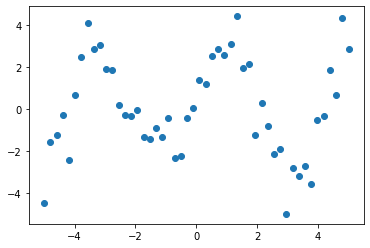

In [17]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6, 4))
plt.scatter(x_data, y_data)
plt.show()

We then use `scipy.optimize.curve_fit` to find $a$ and $b$ :

In [18]:
params, params_covariance = optimize.curve_fit(test_func, x_data, y_data, p0=[2, 2])
print(params)

[2.90066316 1.49620959]


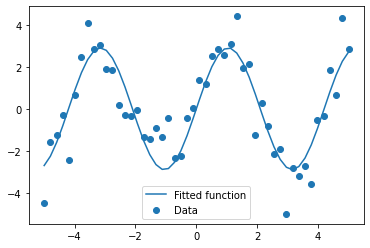

In [19]:
plt.figure(figsize=(6, 4))
plt.scatter(x_data, y_data, label='Data')
plt.plot(x_data, test_func(x_data, params[0], params[1]),
         label='Fitted function')

plt.legend(loc='best')

plt.show()

### Finding the minimum of a scalar function

Let's define the following function: :

In [20]:
def f(x):
    return x**2 + 10*np.sin(x)

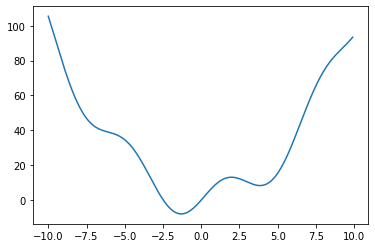

In [21]:
x = np.arange(-10, 10, 0.1)
plt.plot(x, f(x)) 
plt.show() 

This function has a global minimum around -1.3 and a local minimum
around 3.8.

Searching for minimum can be done with `scipy.optimize.minimize`, given
a starting point x0, it returns the location of the minimum that it has
found:


The result of `scipy.optimize.minimize` is a compound object comprising
all information on the convergence

In [30]:
result = optimize.minimize(f, x0=6) 
result 

      fun: 8.31558557947746
 hess_inv: array([[0.11893199]])
      jac: array([0.])
  message: 'Optimization terminated successfully.'
     nfev: 24
      nit: 7
     njev: 8
   status: 0
  success: True
        x: array([3.83746709])

In [23]:
result.x # The coordinate of the minimum

array([-1.30644012])

**Methods**: As the function is a smooth function, gradient-descent
based methods are good options. The [lBFGS
algorithm](https://en.wikipedia.org/wiki/Limited-memory_BFGS) is a good
choice in general:

In [24]:
optimize.minimize(f, x0=0, method="L-BFGS-B")

      fun: array([-7.94582338])
 hess_inv: <1x1 LbfgsInvHessProduct with dtype=float64>
      jac: array([-1.42108547e-06])
  message: b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
     nfev: 12
      nit: 5
   status: 0
  success: True
        x: array([-1.30644013])

Note how it cost only 12 functions evaluation above to find a good value
for the minimum.

**Global minimum**: A possible issue with this approach is that, if the
function has local minima, the algorithm may find these local minima
instead of the global minimum depending on the initial point x0:

In [26]:
res = optimize.minimize(f,x0=3, method="L-BFGS-B")
res.x

array([3.83746709])

If we don't know the neighborhood of the global minimum to choose the
initial point, we need to resort to costlier global optimization. To
find the global minimum, we use `scipy.optimize.basinhopping` (added in
version 0.12.0 of Scipy). It combines a local optimizer with sampling of
starting points:

In [27]:
optimize.basinhopping(f, 5)

                        fun: 8.315585579477457
 lowest_optimization_result:       fun: 8.315585579477457
 hess_inv: array([[0.11880033]])
      jac: array([1.1920929e-07])
  message: 'Optimization terminated successfully.'
     nfev: 18
      nit: 4
     njev: 6
   status: 0
  success: True
        x: array([3.8374671])
                    message: ['requested number of basinhopping iterations completed successfully']
      minimization_failures: 0
                       nfev: 1656
                        nit: 100
                       njev: 552
                          x: array([3.8374671])

**Constraints**: We can constrain the variable to the interval `(0, 10)`
using the "bounds" argument:

**A list of bounds**

As `~scipy.optimize.minimize` works in general with x multidimensionsal,
the "bounds" argument is a list of bound on each dimension.

In [28]:
res = optimize.minimize(f, x0=1,
                        bounds=((0, 10), ))
res.x

array([0.])

What has happened? Why are we finding 0, which is not a mimimum of our
function.

****Minimizing functions of several variables****

To minimize over several variables, the trick is to turn them into a
function of a multi-dimensional variable (a vector). 

`scipy.optimize.minimize_scalar` is a function with dedicated methods to
minimize functions of only one variable.

### Finding the roots of a scalar function

To find a root, i.e. a point where $f(x) = 0$, of the function $f$ above
we can use `scipy.optimize.root` :

In [29]:
root = optimize.root(f)  # our initial guess is 1
root    # The full result

TypeError: root() missing 1 required positional argument: 'x0'

In [ ]:
root.x  # Only the root found

Note that only one root is found. Inspecting the plot of $f$ reveals
that there is a second root around -2.5. We find the exact value of it
by adjusting our initial guess: :

In [66]:
root2 = optimize.root(f, x0=-2.5)
root2.x

array([-2.47948183])

`scipy.optimize.root` also comes with a variety of algorithms, set via
the "method" argument.

Now that we have found the minima and roots of `f` and used curve
fitting on it, we put all those results together in a single plot:

You can find all algorithms and functions with similar functionalities
in the documentation of `scipy.optimize`.